# Очистка данных. Практическая работа

## Цель практической работы

- Научиться выполнять очистку и подготовку данных для их дальнейшего использования в задаче машинного обучения.

## Что нужно сделать

- Загрузить данные в ноутбук.
- Провести разведочный анализ данных.
- Разделить данные на обучающую и тестовую выборки.
- Выполнить очистку и подготовку данных.

## Что оценивается 

1. Выполнены все этапы задания.
1. Не допущены утечки данных.

## Формат сдачи

Выполните предложенные задания: впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

## Задача
Имеется набор данных покупателей супермаркета. Проведите анализ и очистку этих данных.

### Описание данных

Дан файл Mall_Customers.csv, содержащий следующие данные по покупателям сети супермаркетов:
- CustomerID — идентификатор покупателя.
- Genre – пол покупателя.
- Age – возраст покупателя.
- Annual Income (k\$) – годовой доход покупателя, тысяч $.
- Spending Score (1–100) – рейтинг покупателя, целевая переменная.

### Задание 1

Загрузите данные из файла `Mall_Customers.csv` в ноутбук и выведите первые пять строк на экран.

In [100]:
### YOUR CODE HERE ###
import pandas as pd
df = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')

In [101]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19.0,15.0,39
2,Male,NaN,NaN,81
3,Female,NaN,16.0,6
4,Female,23.0,16.0,77
5,Female,31.0,17.0,40


### Задание 2

Проведите разведочный анализ загруженных данных. Обязательные атрибуты для анализа:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

Анализ дополнительных атрибутов и свойств данных приветствуется. Используйте средства визуализации там, где это необходимо.

По результатам анализа сделайте выводы о свойствах отдельных признаков и качестве данных в целом.

In [102]:
### YOUR CODE HERE ###
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Количество пропусков в каждом признаке
print(df.isnull().sum() / df.shape[0])



Genre                     0.095
Age                       0.100
Annual Income (k$)        0.100
Spending Score (1-100)    0.000
dtype: float64


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Genre                   181 non-null    object 
 1   Age                     180 non-null    float64
 2   Annual Income (k$)      180 non-null    float64
 3   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 7.8+ KB


In [104]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,180.000000,180.000000,200.000000
mean,39.894444,5615.433333,50.200000
std,16.842848,74531.115872,25.823522
min,18.000000,15.000000,1.000000
25%,29.000000,42.000000,34.750000
50%,36.000000,61.000000,50.000000
75%,49.000000,78.000000,73.000000
max,135.000000,1000000.000000,99.000000


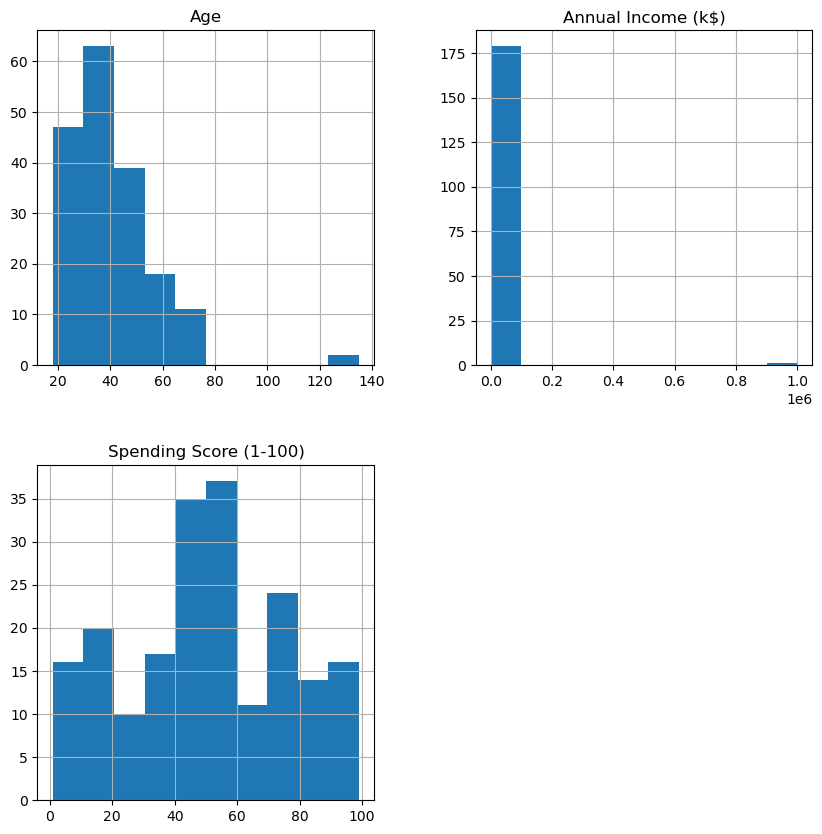

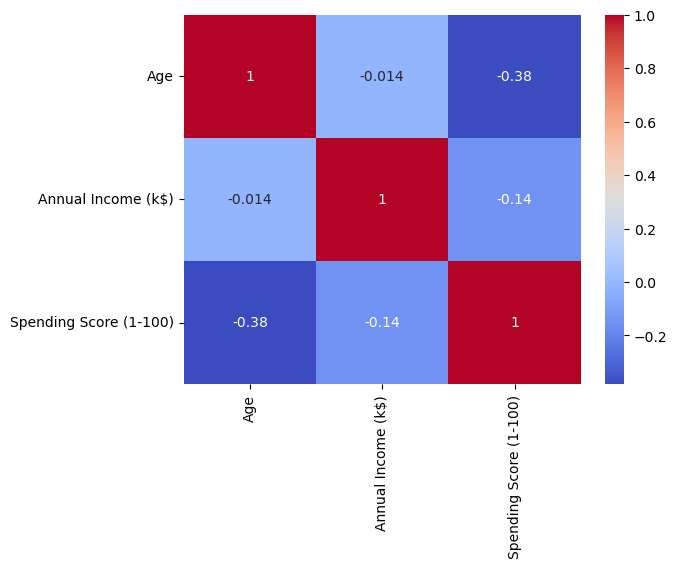

In [105]:
# Распределения признаков
df.hist(figsize=(10, 10))
plt.show()

# Корреляционная матрица
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


Видны выбросы в Age и аномальные значения в Annual Income

В среднем пропущено в каждом столбце 10%

### Задание 3

Разделите данные на обучающую и тестовую выборки в пропорции 80:20. Здесь и далее используйте random_state = 1.

In [106]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split

target = 'Spending Score (1-100)'
X = df.drop(target, axis=1)  
y = df[target]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Задание 4

Заполните пропуски в признаках в обучающей выборке с использованием инструментов sklearn. Для каждого признака выберите и аргументируйте стратегию заполнения пропусков.

In [107]:
### YOUR CODE HERE ###
import pandas as pd
from sklearn.impute import SimpleImputer

imputer_genre = SimpleImputer(strategy='most_frequent')
X_train['Genre'] = imputer_genre.fit_transform(X_train[['Genre']]).reshape(-1)
imputer_age = SimpleImputer(strategy='mean')
X_train['Age'] = imputer_age.fit_transform(X_train[['Age']])

imputer_income = SimpleImputer(strategy='mean')
X_train['Annual Income (k$)'] = imputer_income.fit_transform(X_train[['Annual Income (k$)']])

print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 109 to 38
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Genre               160 non-null    object 
 1   Age                 160 non-null    float64
 2   Annual Income (k$)  160 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.0+ KB
None


### Задание 5

Найдите выбросы в признаках обучающей выборки. Замените выбросы, если таковые имеются, и аргументируйте выбор метода поиска выбросов.


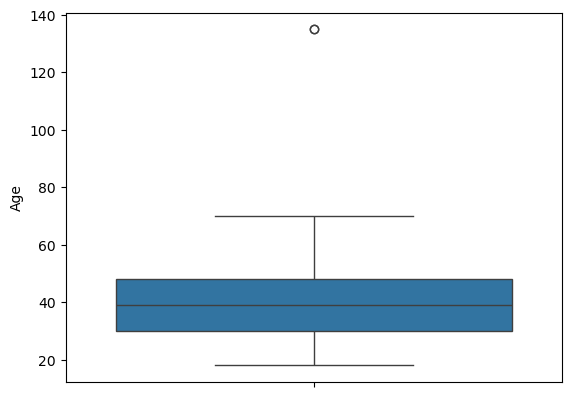

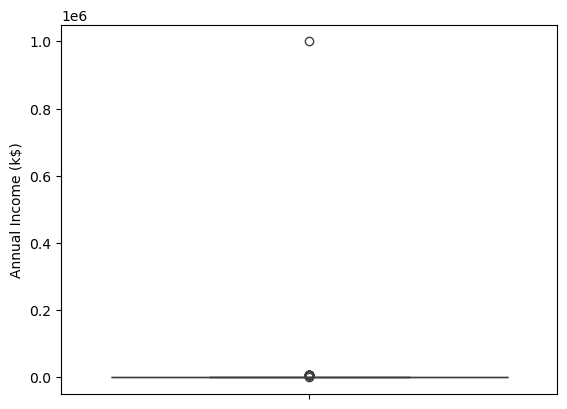

In [108]:
### YOUR CODE HERE ###

# plt.figure(figsize=(10, 6))
# sns.boxplot(data=X_train, orient="h")

# # show the plot
# plt.show()
numerical_columns = ['Age', 'Annual Income (k$)']
for col in numerical_columns:
    sns.boxplot(data=X_train[col])
    plt.show()

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

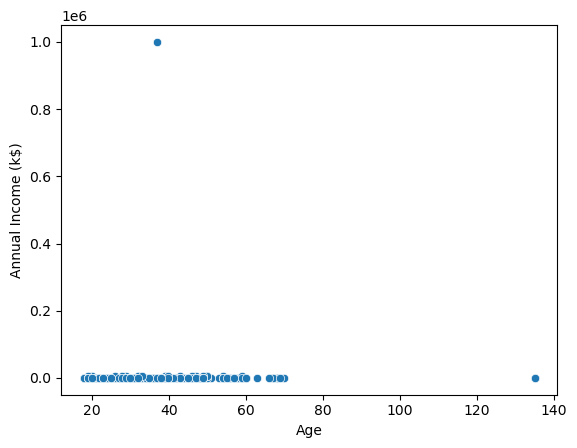

In [109]:
sns.scatterplot(x=X_train[numerical_columns[0]], y=X_train[numerical_columns[1]])

In [119]:
# У нас всего 2 явно выраженных выброса, поэтому просто удалим их (возраст > 100 и доход 1e6)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X_train = X_train[X_train["Age"] <= 100]
X_train = X_train[X_train['Annual Income (k$)']<= 10**4]


### Задание 6

Нормализуйте численные признаки. Аргументируйте выбор стратегии нормализации для каждого признака.


In [111]:
### YOUR CODE HERE ###
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


scaler_age = StandardScaler()
X_train['Age'] = scaler_age.fit_transform(X_train[['Age']])


scaler_income = MinMaxScaler()
X_train['Annual Income (k$)'] = scaler_income.fit_transform(X_train[['Annual Income (k$)']])

### Задание 7

Закодируйте категориальные признаки в обучающей выборке. Аргументируйте выбор способа кодирования.

In [122]:
### YOUR CODE HERE ###
from sklearn.preprocessing import LabelEncoder

le_gender = LabelEncoder()
X_train['Genre'] = le_gender.fit_transform(X_train['Genre'])

### Задание 8
Проведите очистку и подготовку тестовых данных. Используйте препроцессоры и другие инструменты, которые вы уже использовали при подготовке обучающей выборки, без их дополнительной настройки.

In [124]:
### YOUR CODE HERE ###

X_test['Genre'] = imputer_genre.transform(X_test[['Genre']]).reshape(-1)
X_test['Age'] = imputer_age.transform(X_test[['Age']])

X_test['Annual Income (k$)'] = imputer_income.transform(X_test[['Annual Income (k$)']])


X_test['Age'] = scaler_age.transform(X_test[['Age']])

X_test['Annual Income (k$)'] = scaler_income.transform(X_test[['Annual Income (k$)']])
X_test['Genre'] = le_gender.transform(X_test['Genre'])

In [125]:
X_test.head()

,Genre,Age,Annual Income (k$)
CustomerID,,,
59,1,-2.418916,-0.000015
41,1,-2.283975,-0.000015
35,0,-2.340792,-0.000015
103,2,-2.276872,-0.000015
185,1,-2.369201,-0.000015
